In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns


df = pd.read_csv(r"exo-det_type.csv")
print(len(df))

column_list = df.columns.tolist()
for i in range(len(column_list)):
    print(f"{i}: {column_list[i]}", end = "\n")

7509
0: detection_type
1: mass
2: radius
3: orbital_period
4: semi_major_axis
5: eccentricity
6: inclination
7: discovered
8: omega
9: star_distance
10: star_mass
11: star_radius
12: star_age
13: star_teff


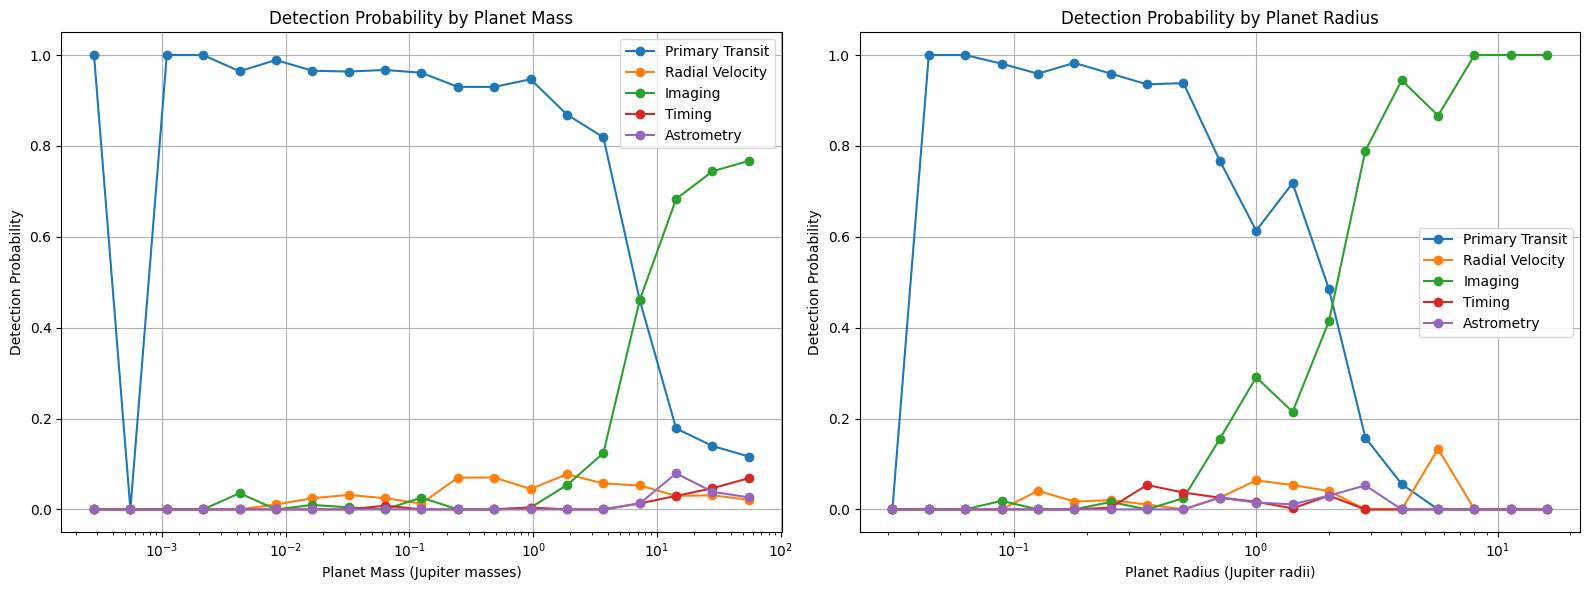

Detection Method Distribution:
detection_type
Primary Transit    1550
Imaging             375
Radial Velocity      81
Timing               25
Astrometry           20
Name: count, dtype: int64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
def plot_detection_probability(df):
    # Group detection types
    detection_methods = df['detection_type'].unique()
    
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Mass-based detection probability
    mass_bins = np.logspace(np.log10(df['mass'].min()), np.log10(df['mass'].max()), 20)
    
    # Detection probability by mass for each detection method
    mass_detection_prob = {}
    for method in detection_methods:
        method_df = df[df['detection_type'] == method]
        
        # Calculate detection probability for each mass bin
        method_mass_prob = []
        for i in range(len(mass_bins)-1):
            bin_min = mass_bins[i]
            bin_max = mass_bins[i+1]
            
            # Planets in this mass range
            planets_in_bin = df[(df['mass'] >= bin_min) & (df['mass'] < bin_max)]
            
            # Planets detected in this method and mass range
            detected_in_bin = planets_in_bin[planets_in_bin['detection_type'] == method]
            
            # Calculate probability
            prob = len(detected_in_bin) / len(planets_in_bin) if len(planets_in_bin) > 0 else 0
            method_mass_prob.append(prob)
        
        mass_detection_prob[method] = method_mass_prob
    
    # Plot mass-based detection probability
    ax1.set_xscale('log')
    for method, probs in mass_detection_prob.items():
        ax1.plot((mass_bins[:-1] + mass_bins[1:]) / 2, probs, label=method, marker='o')
    
    ax1.set_xlabel('Planet Mass (Jupiter masses)')
    ax1.set_ylabel('Detection Probability')
    ax1.set_title('Detection Probability by Planet Mass')
    ax1.legend()
    ax1.grid(True)
    
    # Radius-based detection probability
    radius_bins = np.logspace(np.log10(df['radius'].min()), np.log10(df['radius'].max()), 20)
    
    # Detection probability by radius for each detection method
    radius_detection_prob = {}
    for method in detection_methods:
        method_df = df[df['detection_type'] == method]
        
        # Calculate detection probability for each radius bin
        method_radius_prob = []
        for i in range(len(radius_bins)-1):
            bin_min = radius_bins[i]
            bin_max = radius_bins[i+1]
            
            # Planets in this radius range
            planets_in_bin = df[(df['radius'] >= bin_min) & (df['radius'] < bin_max)]
            
            # Planets detected in this method and radius range
            detected_in_bin = planets_in_bin[planets_in_bin['detection_type'] == method]
            
            # Calculate probability
            prob = len(detected_in_bin) / len(planets_in_bin) if len(planets_in_bin) > 0 else 0
            method_radius_prob.append(prob)
        
        radius_detection_prob[method] = method_radius_prob
    
    # Plot radius-based detection probability
    ax2.set_xscale('log')
    for method, probs in radius_detection_prob.items():
        ax2.plot((radius_bins[:-1] + radius_bins[1:]) / 2, probs, label=method, marker='o')
    
    ax2.set_xlabel('Planet Radius (Jupiter radii)')
    ax2.set_ylabel('Detection Probability')
    ax2.set_title('Detection Probability by Planet Radius')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()


# Call the function to create the plot
plot_detection_probability(df)

# Optional: Print detection method distribution
print("Detection Method Distribution:")
print(df['detection_type'].value_counts())

<Figure size 1200x600 with 0 Axes>

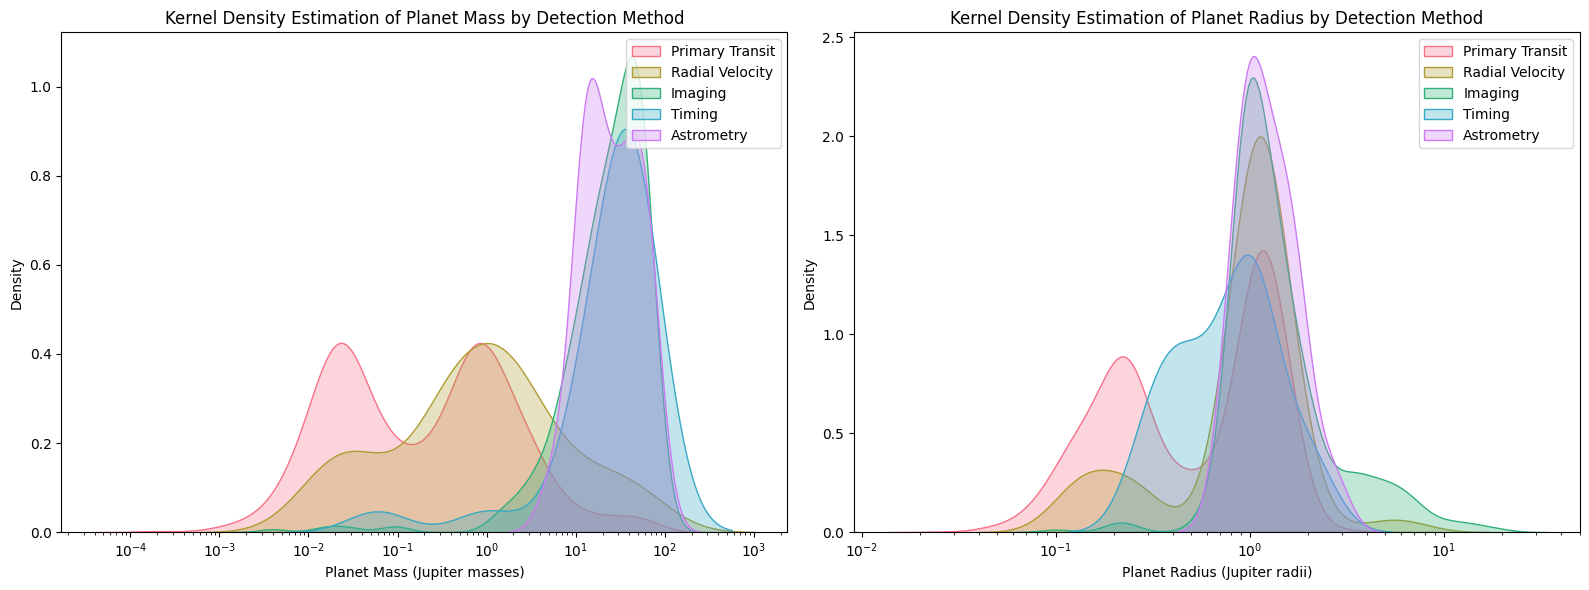

Detection Method Distribution:
detection_type
Primary Transit    1550
Imaging             375
Radial Velocity      81
Timing               25
Astrometry           20
Name: count, dtype: int64


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function to generate KDE plot
def create_planet_kde_plot(df):
    # Set up the plot
    plt.figure(figsize=(12, 6))
    
    # Get unique detection methods
    detection_methods = df['detection_type'].unique()
    
    # Create a color palette
    palette = sns.color_palette("husl", len(detection_methods))
    
    # Create subplots for mass and radius
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # KDE plot for Mass
    for method, color in zip(detection_methods, palette):
        method_data = df[df['detection_type'] == method]
        
        # Log scale for mass
        sns.kdeplot(
            data=method_data, 
            x='mass', 
            ax=ax1, 
            label=method, 
            color=color,
            fill=True,
            alpha=0.3,
            log_scale=True
        )
    
    ax1.set_title('Kernel Density Estimation of Planet Mass by Detection Method')
    ax1.set_xlabel('Planet Mass (Jupiter masses)')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # KDE plot for Radius
    for method, color in zip(detection_methods, palette):
        method_data = df[df['detection_type'] == method]
        
        # Log scale for radius
        sns.kdeplot(
            data=method_data, 
            x='radius', 
            ax=ax2, 
            label=method, 
            color=color,
            fill=True,
            alpha=0.3,
            log_scale=True
        )
    
    ax2.set_title('Kernel Density Estimation of Planet Radius by Detection Method')
    ax2.set_xlabel('Planet Radius (Jupiter radii)')
    ax2.set_ylabel('Density')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


# Create the KDE plot
create_planet_kde_plot(df)

# Print detection method distribution
print("Detection Method Distribution:")
print(df['detection_type'].value_counts())

<Figure size 1200x800 with 0 Axes>

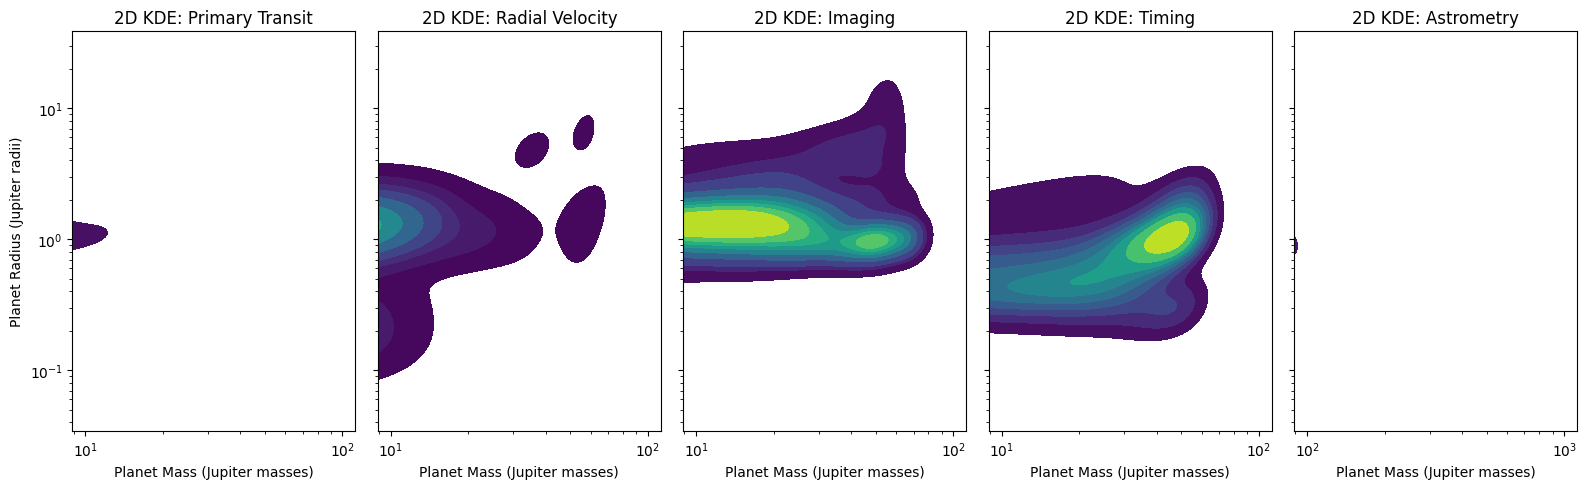

c:\Users\arpan\miniconda3\lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


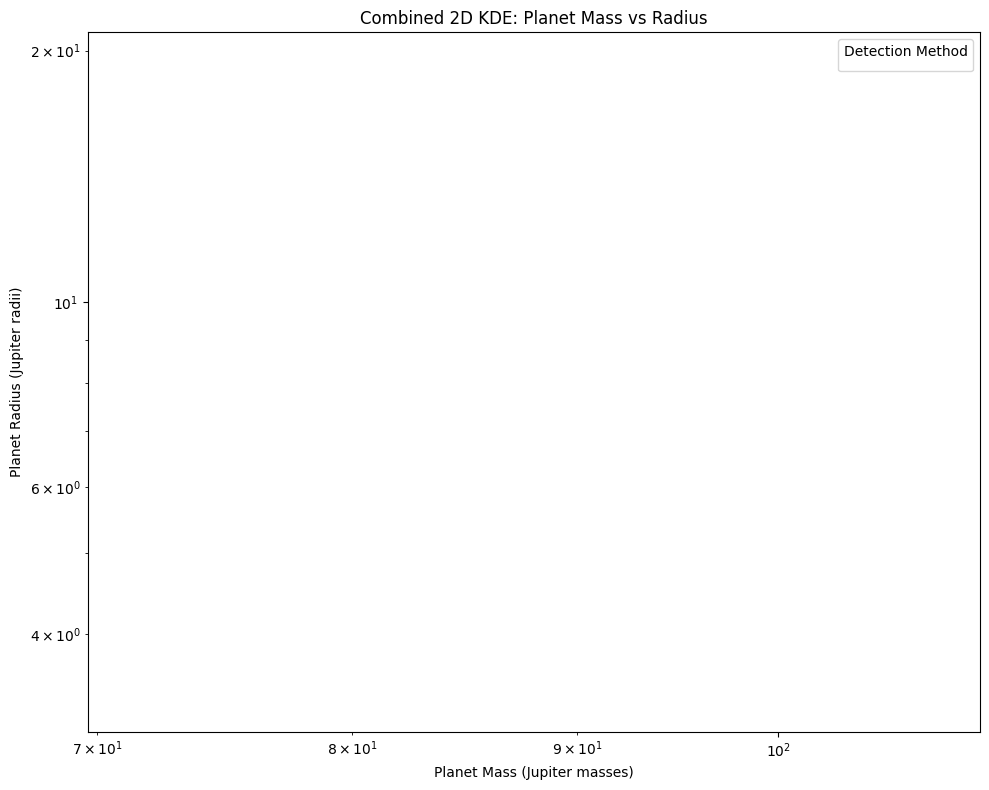

Detection Method Distribution:
detection_type
Primary Transit    1550
Imaging             375
Radial Velocity      81
Timing               25
Astrometry           20
Name: count, dtype: int64


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for 2D KDE plot
def create_2d_kde_plot(df):
    # Set up the figure
    plt.figure(figsize=(12, 8))
    
    # Get unique detection methods
    detection_methods = df['detection_type'].unique()
    
    # Create a subplot for each detection method
    fig, axes = plt.subplots(1, len(detection_methods), figsize=(16, 5), sharey=True)
    
    # Ensure axes is always an array
    if len(detection_methods) == 1:
        axes = [axes]
    
    # Color palette
    palette = sns.color_palette("husl", len(detection_methods))
    
    # Create 2D KDE for each detection method
    for i, (method, ax) in enumerate(zip(detection_methods, axes)):
        # Filter data for specific detection method
        method_data = df[df['detection_type'] == method]
        
        # Create 2D KDE plot
        g = sns.kdeplot(
            data=method_data, 
            x='mass', 
            y='radius', 
            cmap='viridis',
            fill=True,
            thresh=0.05,
            levels=10,
            ax=ax
        )
        
        # Set labels and title
        ax.set_title(f'2D KDE: {method}')
        ax.set_xlabel('Planet Mass (Jupiter masses)')
        ax.set_ylabel('Planet Radius (Jupiter radii)')
        
        # Set log scale
        ax.set_xscale('log')
        ax.set_yscale('log')
    
    plt.tight_layout()
    plt.show()

# Optional: Create a combined 2D KDE for all detection methods
def create_combined_2d_kde(df):
    plt.figure(figsize=(10, 8))
    
    # Create combined 2D KDE
    g = sns.kdeplot(
        data=df, 
        x='mass', 
        y='radius', 
        hue='detection_type',
        cmap='viridis',
        fill=True,
        thresh=0.05,
        levels=10,
        alpha=0.5
    )
    
    plt.title('Combined 2D KDE: Planet Mass vs Radius')
    plt.xlabel('Planet Mass (Jupiter masses)')
    plt.ylabel('Planet Radius (Jupiter radii)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(title='Detection Method')
    
    plt.tight_layout()
    plt.show()

# Create separate 2D KDE plots for each detection method
create_2d_kde_plot(df)

# Create a combined 2D KDE plot
create_combined_2d_kde(df)

# Print detection method distribution
print("Detection Method Distribution:")
print(df['detection_type'].value_counts())